# Kernel Time-varying Graphical Lasso with Real Data

In [1]:
import numpy as np
import pandas as pd
from regainpr.covariance import kernel_latent_time_graph_lasso_
from regainpr.bayesian import wishart_process_; reload(wishart_process_);

In [56]:
# load data
df = pd.read_csv("../regainpr/data/metereological.csv").replace("M", np.NaN) # .fillna(0)

In [59]:
df["temp"] = (df["MAX AT C"].values.astype(float) + df["MIN AT C"].values.astype(float)) / 2.

In [60]:
df['year_month'] = df.DATE.str.split("/").apply(lambda x: "/".join(x[:-1]))

In [63]:
df_temp = df[df.temp.notna()].fillna(0).copy()
df_temp['SNOW cm'] = df_temp['SNOW cm'].values.astype(float)
df_temp['RAIN cm'] = df_temp['RAIN cm'].values.astype(float)
df_temp["precipitation"] = df_temp['SNOW cm'] + df_temp["RAIN cm"]

In [65]:
idx_ok = [k for k, v in df_temp.groupby("year_month").groups.iteritems() if len(v) > 2]

In [66]:
df_filt = df_temp[df_temp.year_month.isin(idx_ok)]

In [67]:
X = df_filt[["temp", "precipitation"]]
y = df_filt.year_month
y = [i.days for i in pd.to_timedelta(pd.to_datetime(y))]

In [ ]:
xaxis = pd.to_datetime(df_filt.year_month)

In [68]:
reload(wishart_process_)
wp = wishart_process_.WishartProcess(n_iter=500, verbose=True)
wp.fit(X, y)

WishartProcess(assume_centered=False, burn_in=125, mu_Lprior=1, mu_prior=1,
        n_iter=500, suppress_warn_list=False, theta=100,
        time_on_axis='last', var_Lprior=1, var_Lprop=10, var_prior=10,
        var_prop=1, verbose=True)

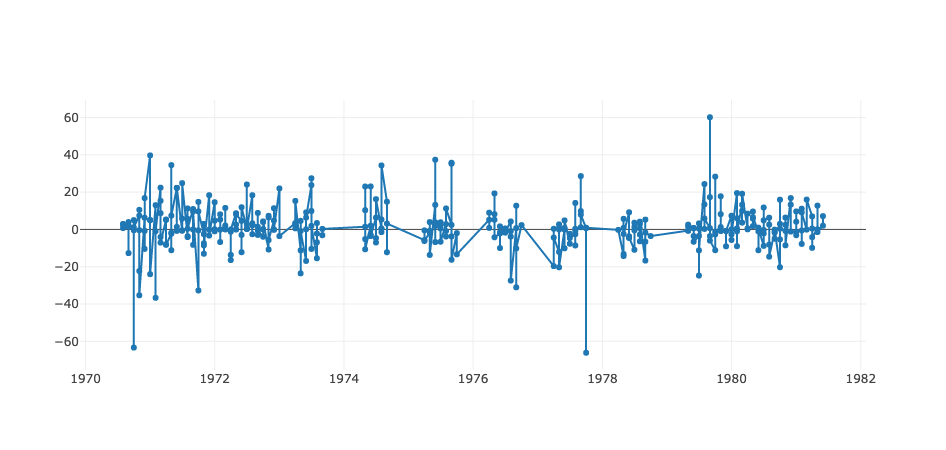

In [72]:
import plotly.offline as py
import plotly.graph_objs as go
from datetime import datetime

py.init_notebook_mode(connected=True)
py.iplot([go.Scatter(y=wp.covariance_[:, 0,1], x=xaxis, mode='markers+lines')])